# Datenmanagement Projekt - Finanzdaten

In [10]:
%%HTML
 <iframe width ='860' height ='450' src='https://vsz.be/wp-content/uploads/bfi_thumb/Meine-Finanzen-im-Blick-oyxbcxtiiyzqwv1rmfwu4tmoocxkecdt0z86x2doyc.jpg' frameborder= '0' allowfullscreen ></iframe>
    <br>Quelle: https://vsz.be/wp-content/uploads/bfi_thumb/Meine-Finanzen-im-Blick-oyxbcxtiiyzqwv1rmfwu4tmoocxkecdt0z86x2doyc.jpg

Importieren benötigter Bibliotheken

In [6]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from datetime import datetime
import time
from influxdb import InfluxDBClient
import matplotlib.pyplot as plt
#import seaborn as sns
#import numpy as np

Verbindung zur InfluxDB, erstellen einer neuen Datenbank "Stock_01" und nutzen dieser

In [2]:
client = InfluxDBClient(host = "localhost",port="8086")
client.create_database("Stock_02")
client.switch_database("Stock_02")

API Zugangsdaten um Gewünschte Daten abrufen zu können 

In [2]:
api_key = 'II5FAR4LUH6SSZTT'

ts = TimeSeries(key=api_key,output_format='pandas')

Einlese-Funktion der Daten in die InfluxDB im Json-Format

In [3]:
def function_name(a,b):
     
    for key,value in a.iterrows():
       
        key_open = value[0]
        key_high = value[1]
        key_low = value[2]
        key_close = value[3]
     
        #JSON Body1
        json_body = [{
     
            "measurement": b,        
                   
        
           "time": key, 
           
           "fields":{
                
                "open": key_open,
                "high": key_high,
                "low": key_low,
                "close": key_close
                        }
        }]
        
        client.write_points(json_body,time_precision="s")
 

Abrufen der Daten aus der InfluxDB Datenbank

In [4]:
# MSFT = Microsoft täglich und wöchentlich       
            
MSFT_weekly,MSFT_data = ts.get_weekly(symbol='MSFT')

function_name(MSFT_weekly, "MSFT_weekly")
     
    
MSFT_daily,MSFT_data = ts.get_daily(symbol='MSFT') 

function_name(MSFT_daily, "MSFT_daily")

    
#%%  TSLA = Tesla täglich und wöchentlich
            
            
TSLA_weekly,TSLA_data = ts.get_weekly(symbol='TSLA')

function_name(TSLA_weekly,"TSLA_weekly")
 
    
TSLA_daily,TSLA_data = ts.get_daily(symbol='TSLA') 

function_name(TSLA_daily, "TSLA_daily")

Umwandeln des Datenformats in Pandas, umschreiben des "timestamps", 
sodass nur das Datum ohne Uhrzeit enthalten ist und diesen als Index des "dataframes"

In [5]:
def function01(request):  #request: z.B."SELECT * from MSFT_weekly"

    results = client.query(request)
    points = list(results.get_points())
    df = pd.DataFrame( points )
    
    pd.set_option("display.max.columns", None)
    df['time'] = pd.to_datetime(df['time'], format='%Y.%m.%d')
    
    df['date'] = [d.date() for d in df['time']]
    
    
    df.index  = df['date']
    df = df[['close','high','low','open']]
    
    #print(df)
    return df

In [7]:
#  Microsoft 
df_MSFT_weekly = function01("SELECT * from MSFT_weekly")
#print(df_MSFT_weekly)
df_MSFT_daily = function01("SELECT * from MSFT_daily")
#print(df_MSFT_daily)

#Tesla
df_TSLA_weekly = function01("SELECT * from TSLA_weekly")
#print(df_TSLA_weekly)
df_TSLA_daily = function01("SELECT * from TSLA_daily")
#print(df_TSLA_daily)

Plotten eines Datenausschnitts z.B. der Spalte "low"

/home/julia/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


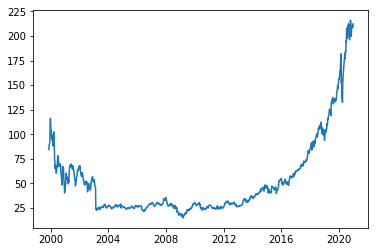

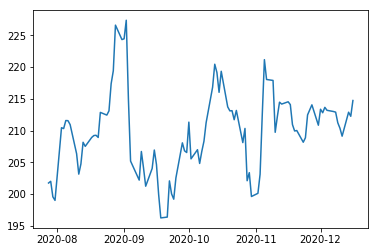

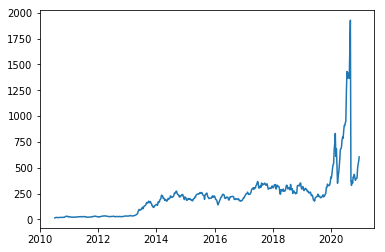

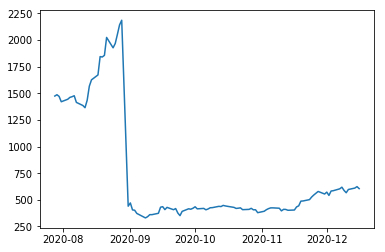

In [8]:
#  Microsoft
plt.plot(df_MSFT_weekly.low)
plt.show()

plt.plot(df_MSFT_daily.low)
plt.show()

#  Tesla
plt.plot(df_TSLA_weekly.low)
plt.show()

plt.plot(df_TSLA_daily.low)
plt.show()

Prozentuale Veränderung des Aktienkurses und letzte Wertänderu

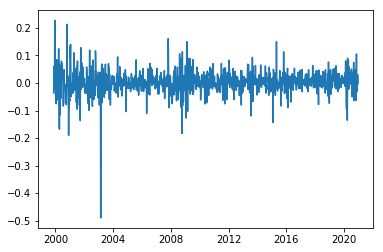

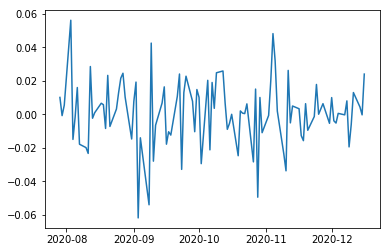

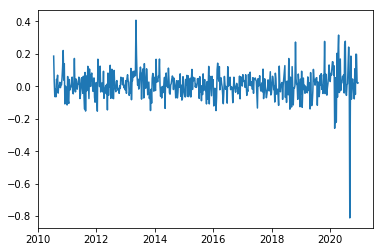

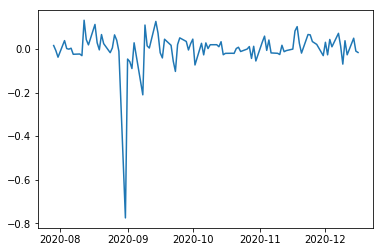

In [9]:
#  Microsoft
close_data = df_MSFT_weekly.close
percentage_change_MSFT_weekly = close_data.pct_change()
#print(percentage_change_MSFT_weekly)

df_MSFT_weekly['percentage_change'] = percentage_change_MSFT_weekly
#print(df_MSFT_weekly)
plt.plot(df_MSFT_weekly.percentage_change)
plt.show()

last_change_MSFT_weekly = list(percentage_change_MSFT_weekly)[-1]

close_data = df_MSFT_daily.close
percentage_change_MSFT_daily = close_data.pct_change()
#print(percentage_change_MSFT_daily)

df_MSFT_daily['percentage_change'] = percentage_change_MSFT_daily
plt.plot(df_MSFT_daily.percentage_change)
plt.show()

last_change_MSFT_daily = list(percentage_change_MSFT_daily)[-1]
    
    
# Tesla
close_data = df_TSLA_weekly.close
percentage_change_TSLA_weekly = close_data.pct_change()
#print(percentage_change_TSLA_weekly)

df_TSLA_weekly['percentage_change'] = percentage_change_TSLA_weekly
plt.plot(df_TSLA_weekly.percentage_change)
plt.show()

last_change_TSLA_weekly = list(percentage_change_TSLA_weekly)[-1]

close_data = df_TSLA_daily.close
percentage_change_TSLA_daily = close_data.pct_change()
#print(percentage_change_TSLA_daily)

df_TSLA_daily['percentage_change'] = percentage_change_TSLA_daily
plt.plot(df_TSLA_daily.percentage_change)
plt.show()

last_change_TSLA_daily = list(percentage_change_TSLA_daily)[-1]

Warnung, die ausgegeben wird bei einer prozentualer Änderung größer 4%

In [10]:
if last_change_MSFT_weekly > 0.04:
    print ('BUY MORE MSFT!')
    
else:
    last_change_MSFT_weekly < -0.04 
    print ('SELL MSFT!!!')


if last_change_TSLA_weekly > 0.04:
    print ('BUY MORE TSLA!')
    
else:
    last_change_TSLA_weekly < -0.04 
    print ('SELL TSLA!!!')

Da die Daten hohen Schwankungen unterliegen, ist es schwierig einen möglichen Trend wie siech die Daten entwickelen zu erkennen. 
Ein "wandernder Durchschnitt" (engl. moving average) ermittelt den Mittelwert für ein Datenfenster und "wandert" dann weiter.

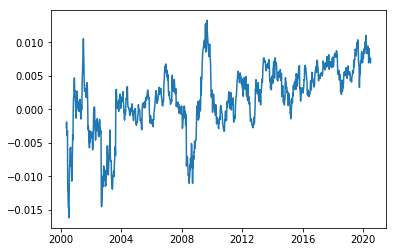

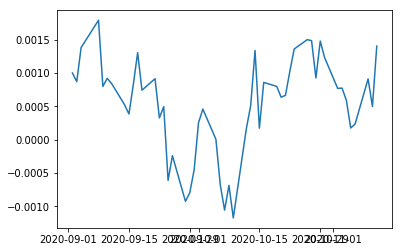

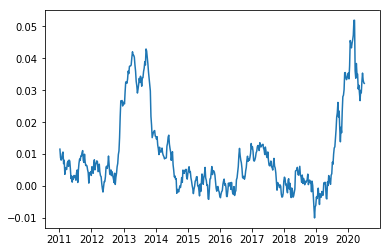

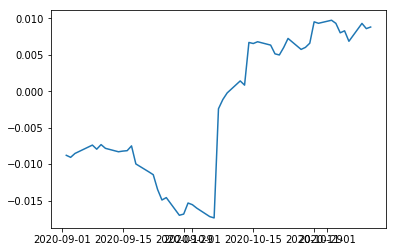

In [11]:
#%%  Moving average 

#  MSFT daily
mov_avg = df_MSFT_weekly.percentage_change.rolling(window = 50, center = True).mean()
plt.plot(mov_avg)
plt.show()

mov_avg = df_MSFT_daily.percentage_change.rolling(window = 50, center = True).mean()
plt.plot(mov_avg)
plt.show()


#  TSLA daily
mov_avg = df_TSLA_weekly.percentage_change.rolling(window = 50, center = True).mean()
plt.plot(mov_avg)
plt.show()


mov_avg = df_TSLA_daily.percentage_change.rolling(window = 50, center = True).mean()
plt.plot(mov_avg)
plt.show()